In [1]:
import sys
sys.path.append('../')

import porousmedialab.analytical_solutions as analytical_solutions
%matplotlib inline

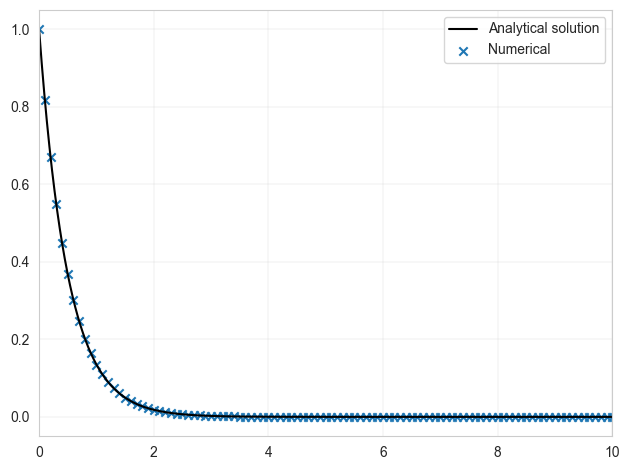

In [2]:
analytical_solutions.reaction_equation_plot()

Simulation started:
	 2026-01-30 18:25:05


Estimated time of the code execution:
	 0h:00m:00s
Will finish approx.:
	 2026-01-30 18:25:06


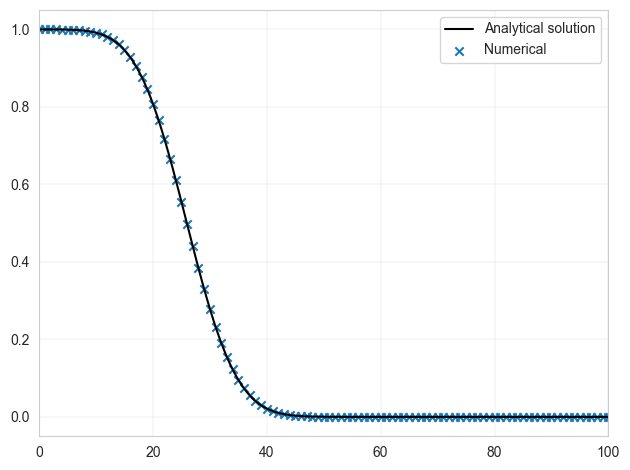

In [3]:
analytical_solutions.transport_equation_plot()

Simulation started:
	 2026-01-30 18:25:06


Estimated time of the code execution:
	 0h:00m:00s
Will finish approx.:
	 2026-01-30 18:25:06


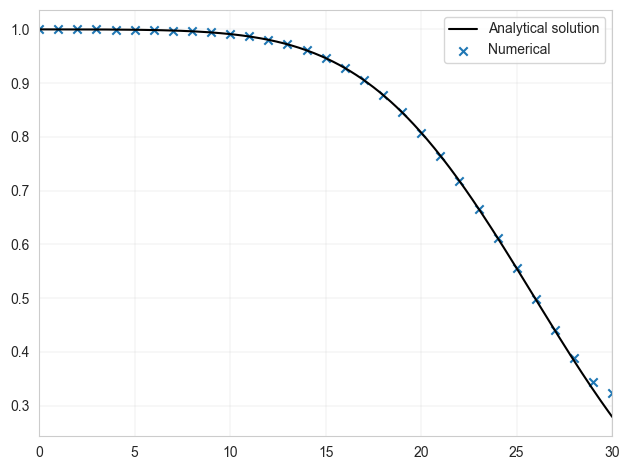

In [4]:
analytical_solutions.transport_equation_boundary_effect()

In [5]:
import numpy as np
import porousmedialab

In [6]:
!pip install cmocean

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

'2026-01-30 18:25:11.507206'

In [8]:
C0 = {'C': 1}
coef = {'k': 2}
rates = {'R': 'k*C'}
dcdt = {'C': '-R'}
dt = 0.001
T = 10
time = np.linspace(0, T, int(T / dt) + 1)
num_sol = np.array(C0['C'])
for i in range(1, len(time)):
    C_new, _, _ = porousmedialab.desolver.ode_integrate(
        C0, dcdt, rates, coef, dt, solver='rk4')
    C0['C'] = C_new['C']
    num_sol = np.append(num_sol, C_new['C'])
assert max(num_sol - np.exp(-coef['k'] * time)) < 1e-5



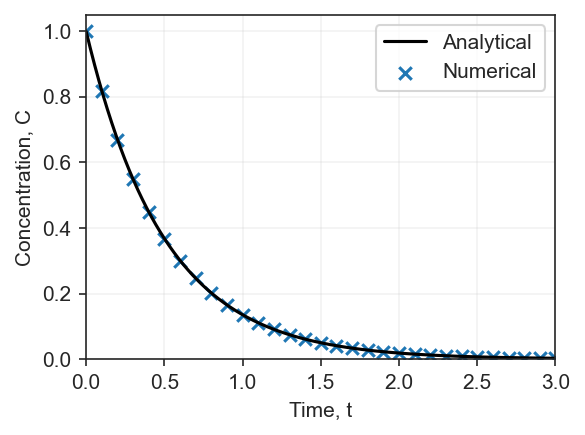

In [9]:
plt.figure(figsize=(4,3), dpi=150)
plt.plot(time, np.exp(-coef['k'] * time), 'k', label='Analytical')
plt.scatter(time[::100], num_sol[::100], marker='x', label='Numerical')
plt.xlim([time[0], time[-1]])
ax = plt.gca()
plt.ylim(0,None)
plt.xlim(0,3)
ax.ticklabel_format(useOffset=False)
ax.grid(linestyle='-', linewidth=0.2)
plt.legend()
plt.xlabel('Time, t')
plt.ylabel('Concentration, C')
plt.tight_layout()
plt.savefig('analytical_reactions.pdf')